## Basic Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df3 = pd.read_csv("ecommerceData-Revised.csv")
df3.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Hour,Month
0,0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2020-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,12
1,1,536365,71053,WHITE METAL LANTERN,6,2020-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12
2,2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2020-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,12
3,3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2020-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12
4,4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2020-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12


In [4]:
df3.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df3['InvoiceNo']=pd.to_numeric(df3['InvoiceNo'])

In [6]:
df3.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Hour,Month
87893,547864,22499,WOODEN UNION JACK BUNTING,2,2021-03-27 13:10:00,5.95,15716,United Kingdom,11.9,13,3
372656,579555,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,4,2021-11-30 11:08:00,2.95,16241,United Kingdom,11.8,11,11
129735,553356,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,12,2021-05-16 14:05:00,1.45,14038,United Kingdom,17.4,14,5


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391183 entries, 0 to 391182
Data columns (total 11 columns):
InvoiceNo      391183 non-null int64
StockCode      391183 non-null int64
Description    391183 non-null object
Quantity       391183 non-null int64
InvoiceDate    391183 non-null object
UnitPrice      391183 non-null float64
CustomerID     391183 non-null int64
Country        391183 non-null object
TotalAmount    391183 non-null float64
Hour           391183 non-null int64
Month          391183 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 32.8+ MB


### Popular Items Bought

In [8]:
df3['Description'].value_counts().nunique()

514

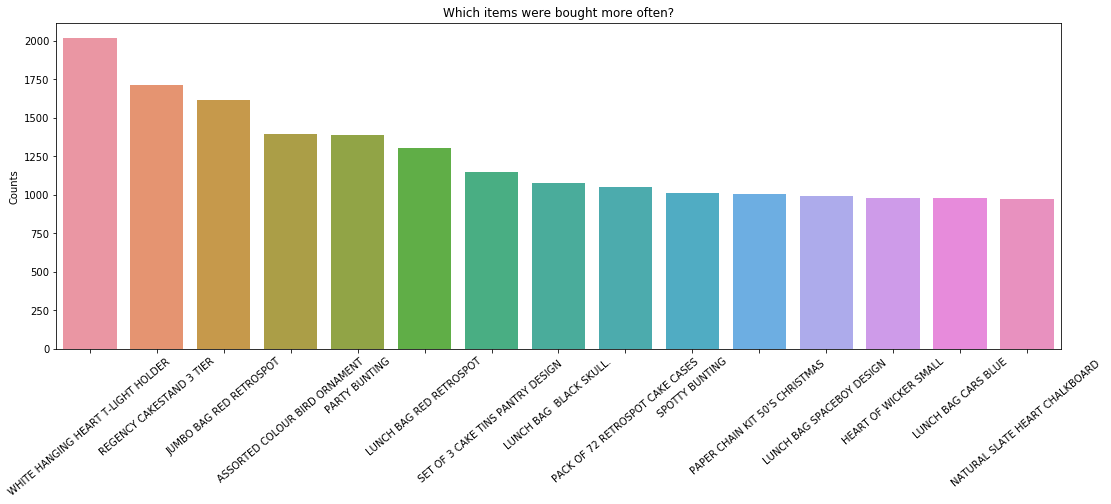

In [9]:
item_counts = df3['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values)
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=40);

### Orders By Country

,sum
Country,
United Kingdom,4247040
Netherlands,200834
EIRE,140283
Germany,118033
France,110594


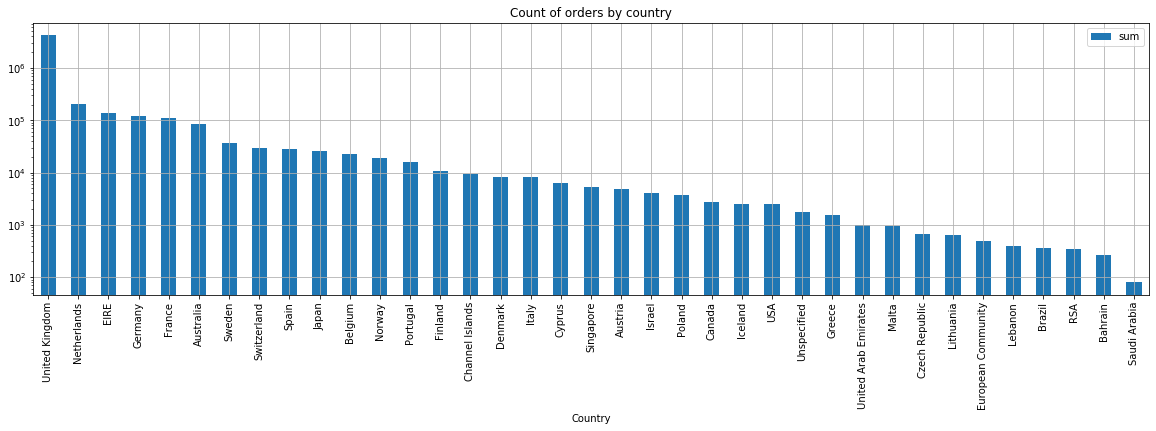

In [10]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
stats_country = df3.groupby(['Country']).Quantity.agg([np.sum])
stats_country.sort_values(by='sum',ascending=False).plot(kind='bar',ax=ax).set_title('Count of orders by country')
plt.yscale("log")
plt.grid()

stats_country.sort_values(by='sum',ascending=False).head()

### Mean Values of Orders in Different Countries

                   mean
Country                
Netherlands  122.050447
Australia    116.740330
Japan        116.561900
Sweden        86.250187
Denmark       49.622180


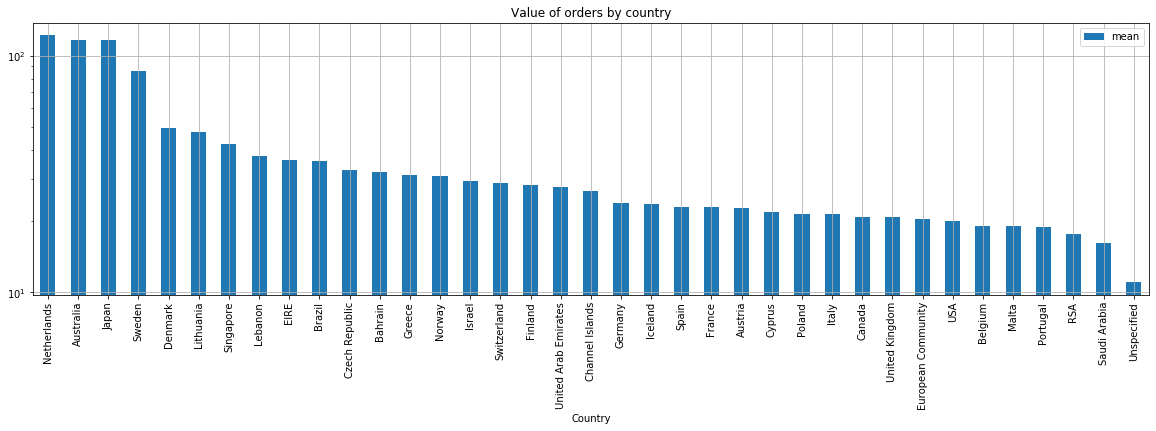

In [11]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
stats_country = df3.groupby(['Country']).TotalAmount.agg([np.mean])
stats_country.sort_values(by='mean',ascending=False).plot(kind='bar',ax=ax).set_title('Value of orders by country')
plt.yscale("log")
plt.grid()

print(stats_country.sort_values(by='mean',ascending=False).head())

### Items Purchased in Bulk

In [12]:
for i in df3.Quantity.sort_values(ascending=False)[:5].values:
    print(df3[df3['Quantity']==i]['Description'])

390722    PAPER CRAFT , LITTLE BIRDIE
Name: Description, dtype: object
36381    MEDIUM CERAMIC TOP STORAGE JAR
Name: Description, dtype: object
364363    ASSTD DESIGN 3D PAPER STICKERS
Name: Description, dtype: object
303453    WORLD WAR 2 GLIDERS ASSTD DESIGNS
Name: Description, dtype: object
140992    SMALL POPCORN HOLDER
Name: Description, dtype: object


These items have been bought in a bulk.

### CustomerId to country

In [13]:
stats_cust = df3.groupby(['CustomerID'])
for key,value in stats_cust:
    if len(value.Country.unique()) > 1:
        print(key, value.Country.unique())


12370 ['Cyprus' 'Austria']
12394 ['Belgium' 'Denmark']
12417 ['Belgium' 'Spain']
12422 ['Australia' 'Switzerland']
12429 ['Denmark' 'Austria']
12431 ['Australia' 'Belgium']
12455 ['Cyprus' 'Spain']
12457 ['Switzerland' 'Cyprus']


The list of customers above seems to have placed orders from multiple countries. For others, there is a 1-to-1 mapping between customer and country.

### Stock Code to description

In [14]:
stats_stock = df3.groupby(['StockCode'])
counter = 0
for key, value in stats_stock:
    if counter < 2:
        print("KEY\n",key)
        print("Description\n",value.Description)
        counter += 1

KEY
 10002
Description
 31        INFLATABLE POLITICAL GLOBE 
140       INFLATABLE POLITICAL GLOBE 
4003      INFLATABLE POLITICAL GLOBE 
5093      INFLATABLE POLITICAL GLOBE 
7540      INFLATABLE POLITICAL GLOBE 
11092     INFLATABLE POLITICAL GLOBE 
13321     INFLATABLE POLITICAL GLOBE 
13547     INFLATABLE POLITICAL GLOBE 
13586     INFLATABLE POLITICAL GLOBE 
13984     INFLATABLE POLITICAL GLOBE 
14337     INFLATABLE POLITICAL GLOBE 
14947     INFLATABLE POLITICAL GLOBE 
17143     INFLATABLE POLITICAL GLOBE 
19250     INFLATABLE POLITICAL GLOBE 
19657     INFLATABLE POLITICAL GLOBE 
22575     INFLATABLE POLITICAL GLOBE 
27025     INFLATABLE POLITICAL GLOBE 
27624     INFLATABLE POLITICAL GLOBE 
31731     INFLATABLE POLITICAL GLOBE 
31866     INFLATABLE POLITICAL GLOBE 
33723     INFLATABLE POLITICAL GLOBE 
34913     INFLATABLE POLITICAL GLOBE 
35135     INFLATABLE POLITICAL GLOBE 
35556     INFLATABLE POLITICAL GLOBE 
36681     INFLATABLE POLITICAL GLOBE 
36913     INFLATABLE POLIT

The above analysis suggests that stockcode is uniquely mapped to the Description. 
If one were to use Description in the analysis and modeling, we can use StockCode to imput missing values.

### Popular Invoices that had Max Number of Items

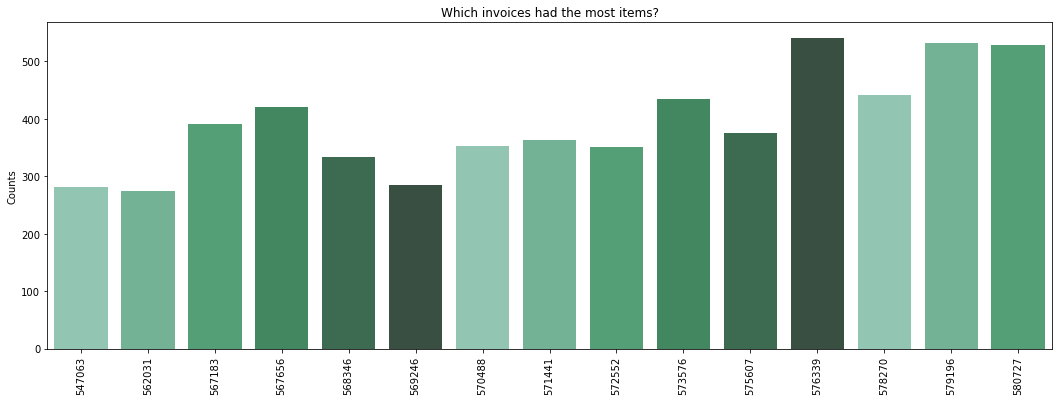

In [15]:
inv_counts = df3['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(inv_counts.index, inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

### Month-Wise Most Sales

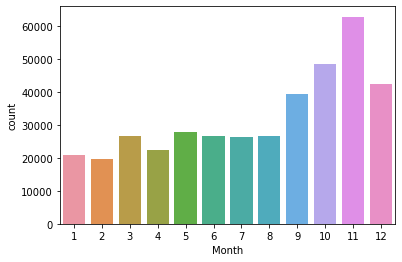

In [16]:
sns.countplot(x='Month',data=df3)

Highest Sales are in the month of November, followed by October and December.

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391183 entries, 0 to 391182
Data columns (total 11 columns):
InvoiceNo      391183 non-null int64
StockCode      391183 non-null int64
Description    391183 non-null object
Quantity       391183 non-null int64
InvoiceDate    391183 non-null object
UnitPrice      391183 non-null float64
CustomerID     391183 non-null int64
Country        391183 non-null object
TotalAmount    391183 non-null float64
Hour           391183 non-null int64
Month          391183 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 32.8+ MB


### Hour-Wise Most Sales

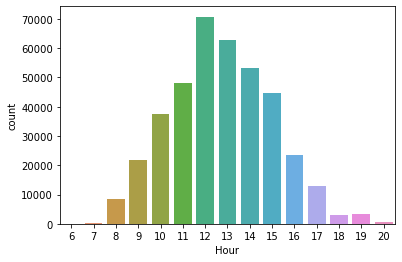

In [18]:
sns.countplot(x='Hour',data=df3)

Most of the people prefer shopping between 10.00 AM to 3.00 PM, with the peak hour being 12.00 Noon.

### Country Hour-Wise Sales

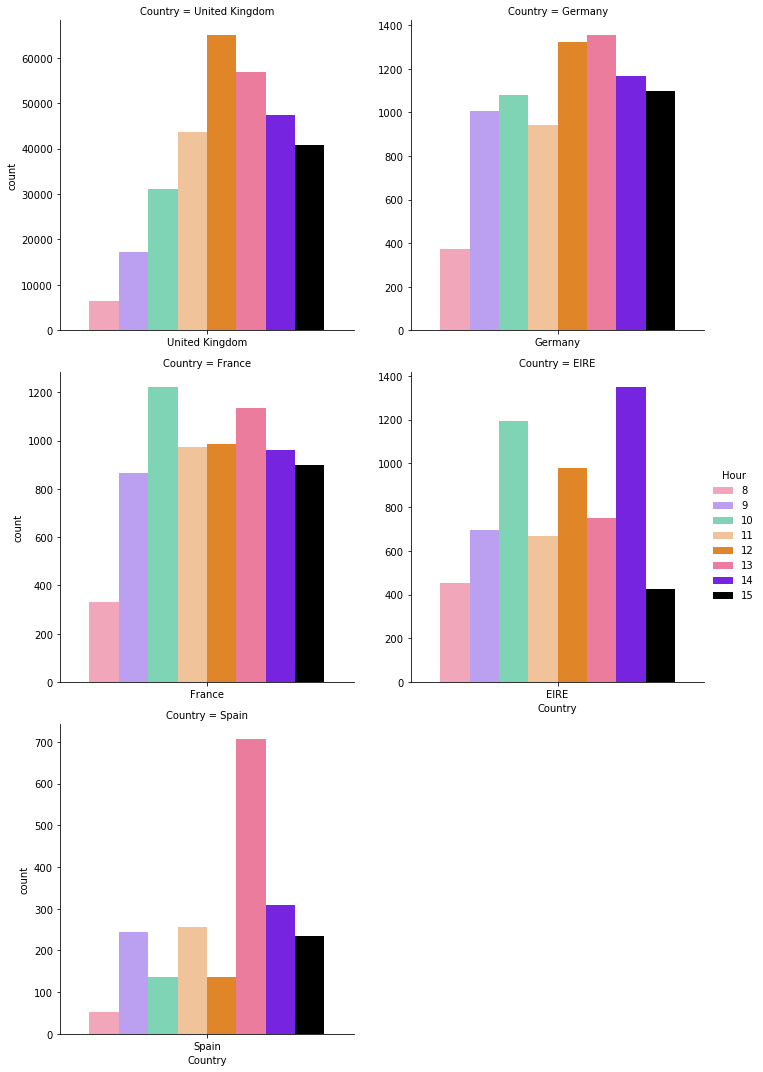

In [19]:
sns.catplot(x='Country',kind='count',
            data=df3,col='Country',
            col_wrap=2,
            col_order=df3['Country'].value_counts()[:5].index,
             #order=df['Country'].value_counts()[:5].index,
             hue='Hour',
            palette=['#FD9AB4','#B791FF','#71E2B9','#FFC28C','#FF8609','#FF6997','#7205FF','#000000'],
             hue_order=df3['Hour'].unique()[:8],
            sharey=False,sharex=False
           )